In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import math
import os
import funciones

In [2]:
desc_2 = os.path.join('Proyecto Herramienta para monitoreo de la calidad de datos', '2. Datos', 'planta_2', 'planta_2_descripcion.csv')
desc_planta_2 = pd.read_csv(desc_2)
desc_planta_2

,name,unit,type_var,periodicity,critical_max_value,warning_max_value,warning_min_value,critical_min_value
0,Flujo Afluente PTAR,L/s,caudal,1 minutes,5500.0,5000.0,200.0,0.0
1,Flujo Cámara de contacto 1,L/s,caudal,1 minutes,NaN,NaN,NaN,NaN
2,Flujo Cámara de contacto 2,L/s,caudal,1 minutes,NaN,NaN,NaN,NaN
3,Flujo Alimentación Digestor 1,L/s,caudal,1 minutes,NaN,NaN,NaN,NaN
4,Flujo Alimentación Digestor 2,L/s,caudal,1 minutes,NaN,NaN,NaN,NaN
5,Flujo Alimentación Digestor 3,L/s,caudal,1 minutes,NaN,NaN,NaN,NaN
6,Nivel Pozo WAS,m,nivel,1 minutes,NaN,NaN,NaN,NaN
7,Flujo Salida de Lodo Sedimentador Secundario 3,L/s,caudal,1 minutes,NaN,NaN,NaN,0.0
8,Flujo Aire Reactor 1,L/s,flujo-aire-soplador,1 minutes,NaN,NaN,NaN,NaN
9,Flujo Aire Reactor 2,L/s,flujo-aire-soplador,1 minutes,NaN,NaN,NaN,NaN


In [3]:
planta_2 = os.path.join('Proyecto Herramienta para monitoreo de la calidad de datos', '2. Datos', 'planta_2', 'planta_2_datos.csv')
df_planta_2 = pd.read_csv(planta_2)

df_planta_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440471 entries, 0 to 440470
Data columns (total 15 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   date_time                                       440471 non-null  object 
 1   Flujo Cámara de contacto 1                      413476 non-null  float64
 2   Flujo Salida de Lodo Sedimentador Secundario 3  320223 non-null  float64
 3   Flujo Aire Reactor 2                            369901 non-null  float64
 4   test                                            3 non-null       float64
 5   Nivel Pozo WAS                                  320190 non-null  float64
 6   OD Reactor 2                                    115736 non-null  float64
 7   Flujo Afluente PTAR                             423581 non-null  float64
 8   Flujo Alimentación Digestor 1                   195755 non-null  float64
 9   Flujo Alimentación Digesto

In [4]:
df_planta_2['date_time'] = pd.to_datetime(df_planta_2['date_time'])

df_planta_2.dropna(axis=1, how='all', inplace=True)
df_planta_2.drop(columns=['test'], inplace=True)

In [5]:
df_planta_2.describe()

,date_time,Flujo Cámara de contacto 1,Flujo Salida de Lodo Sedimentador Secundario 3,Flujo Aire Reactor 2,Nivel Pozo WAS,OD Reactor 2,Flujo Afluente PTAR,Flujo Alimentación Digestor 1,Flujo Alimentación Digestor 2,Flujo Alimentación Digestor 3,Flujo Aire Reactor 1,Flujo Aire Reactor 3,OD Reactor 1,Flujo Cámara de contacto 2
count,440471,413476.000000,320223.000000,369901.000000,320190.000000,115736.0,423581.000000,195755.000000,182100.000000,301633.000000,68814.000000,320052.000000,121056.000000,413563.000000
mean,2025-02-04 12:30:42.207091968,1707.055478,130.546309,188.470481,2.946176,0.0,2732.298090,11.284186,8.455228,5.779215,4805.031407,7411.837532,3.483106,1682.810497
min,2024-08-12 16:32:00,303.000000,0.000000,-4.000000,0.000000,0.0,0.000000,-0.273000,-0.309000,0.000000,0.000000,-6.000000,0.116000,-3.500000
25%,2024-10-29 04:55:30,1369.500000,125.050000,0.000000,2.650000,0.0,2039.799927,7.115000,0.003000,0.012200,128.400000,7840.800000,1.758000,1345.000000
50%,2025-02-10 06:26:00,1730.500000,129.300000,197.000000,2.873900,0.0,2821.000000,14.202000,11.440000,0.073200,8369.000000,8143.000000,3.282000,1738.000000
75%,2025-05-11 05:18:30,2011.000000,138.649994,307.200000,3.150000,0.0,3356.500000,16.070000,12.006000,14.701000,8888.850000,8387.000000,4.674000,1970.000000
max,2025-08-09 23:59:00,3817.000000,254.100006,2379.000000,6.300000,0.0,5005.699707,30.711000,31.500000,40.600000,9006.000000,9006.000000,23.000000,4997.000000
std,NaN,493.651228,11.846629,165.746660,0.489621,0.0,945.847500,6.444520,5.789601,7.224406,4267.435405,2385.157119,2.326163,486.551125


In [6]:
df_planta_2['OD Reactor 2'] = df_planta_2['OD Reactor 2'].astype(bool)

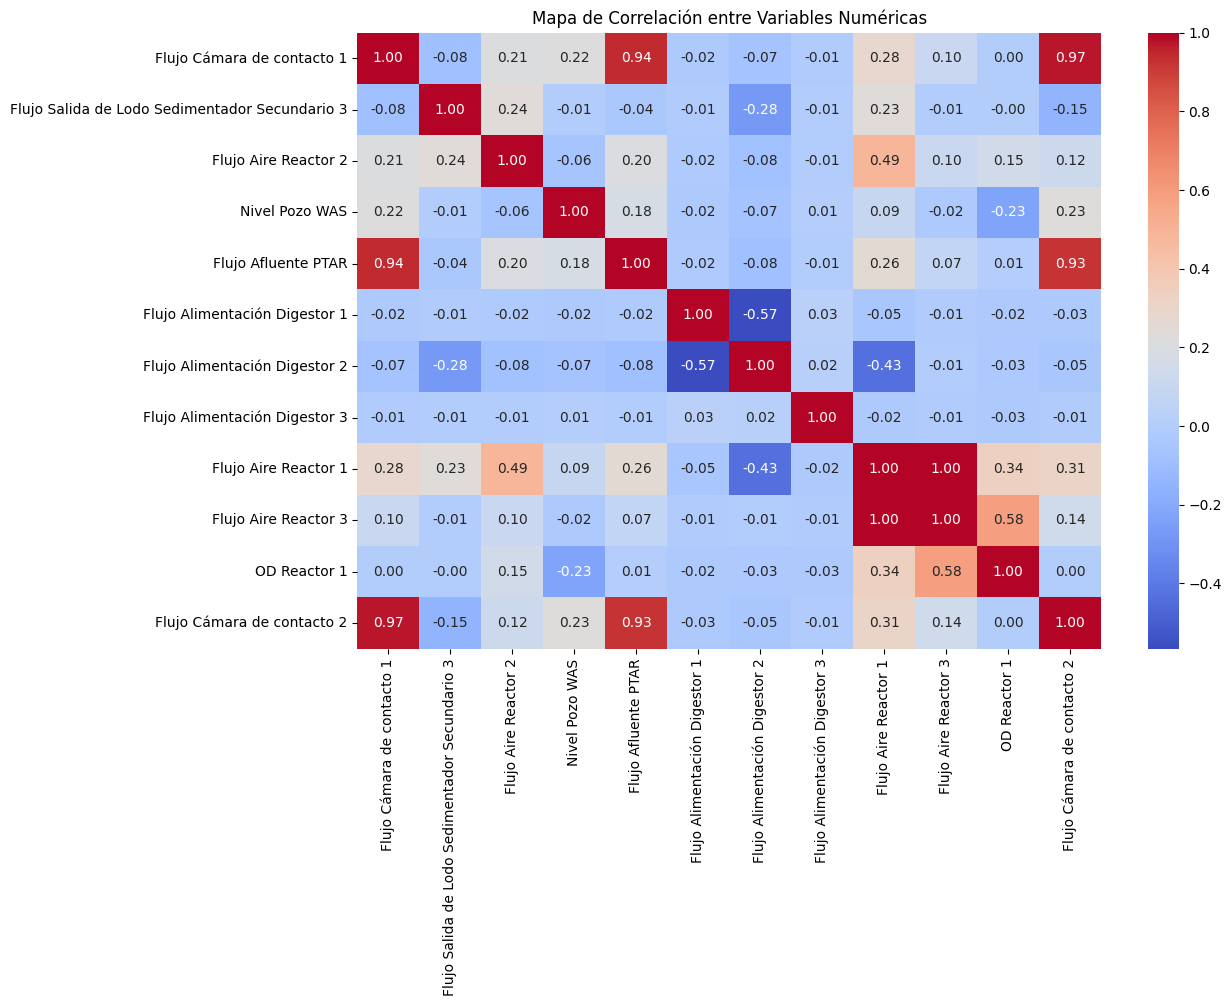

In [7]:
funciones.plot_corr(df_planta_2)

In [8]:
# Paso 1: transformar a formato largo
df_largo = df_planta_2.melt(
    id_vars=['date_time'],
    var_name='name',
    value_name='valor'
 )

# Paso 2: unir con los límites
df_merged = df_largo.merge(desc_planta_2, on='name', how='left')

# Paso 3: función de chequeo
def evaluar_estado(row):
    v = row['valor']
    cmax = row['critical_max_value']
    wmax = row['warning_max_value']
    wmin = row['warning_min_value']
    cmin = row['critical_min_value']

    if pd.isna(v):
        return "sin_dato"
    if not pd.isna(cmax) and v > cmax:
        return "critico_max"
    if not pd.isna(cmin) and v < cmin:
        return "critico_min"
    if not pd.isna(wmax) and v > wmax:
        return "advertencia_max"
    if not pd.isna(wmin) and v < wmin:
        return "advertencia_min"
    return "ok"

# Paso 4: aplicar evaluación
df_merged['estado'] = df_merged.apply(evaluar_estado, axis=1)

# Paso 5: resumen por variable
resumen_alertas = df_merged.groupby(['name', 'estado']).size().unstack(fill_value=0)

# Si quieres solo las filas fuera de rango:
fuera_de_rango = df_merged[df_merged['estado'].str.startswith(('critico', 'advertencia'))].reset_index(drop=True)

In [9]:
fuera_de_rango

,date_time,name,valor,unit,type_var,periodicity,critical_max_value,warning_max_value,warning_min_value,critical_min_value,estado
0,2024-11-08 22:26:00,Flujo Afluente PTAR,5005.0,L/s,caudal,1 minutes,5500.0,5000.0,200.0,0.0,advertencia_max
1,2024-11-09 00:40:00,Flujo Afluente PTAR,5005.0,L/s,caudal,1 minutes,5500.0,5000.0,200.0,0.0,advertencia_max
2,2024-11-09 01:07:00,Flujo Afluente PTAR,5003.6,L/s,caudal,1 minutes,5500.0,5000.0,200.0,0.0,advertencia_max
3,2024-11-09 01:08:00,Flujo Afluente PTAR,5004.3,L/s,caudal,1 minutes,5500.0,5000.0,200.0,0.0,advertencia_max
4,2024-11-09 03:10:00,Flujo Afluente PTAR,5003.6,L/s,caudal,1 minutes,5500.0,5000.0,200.0,0.0,advertencia_max
...,...,...,...,...,...,...,...,...,...,...,...
5220,2025-08-09 22:23:00,OD Reactor 1,16.0,mg/l,oxigeno-disuelto,1 minutes,9.0,7.5,NaN,NaN,critico_max
5221,2025-08-09 22:48:00,OD Reactor 1,14.0,mg/l,oxigeno-disuelto,1 minutes,9.0,7.5,NaN,NaN,critico_max
5222,2025-08-09 23:18:00,OD Reactor 1,15.0,mg/l,oxigeno-disuelto,1 minutes,9.0,7.5,NaN,NaN,critico_max
5223,2025-08-09 23:40:00,OD Reactor 1,11.0,mg/l,oxigeno-disuelto,1 minutes,9.0,7.5,NaN,NaN,critico_max


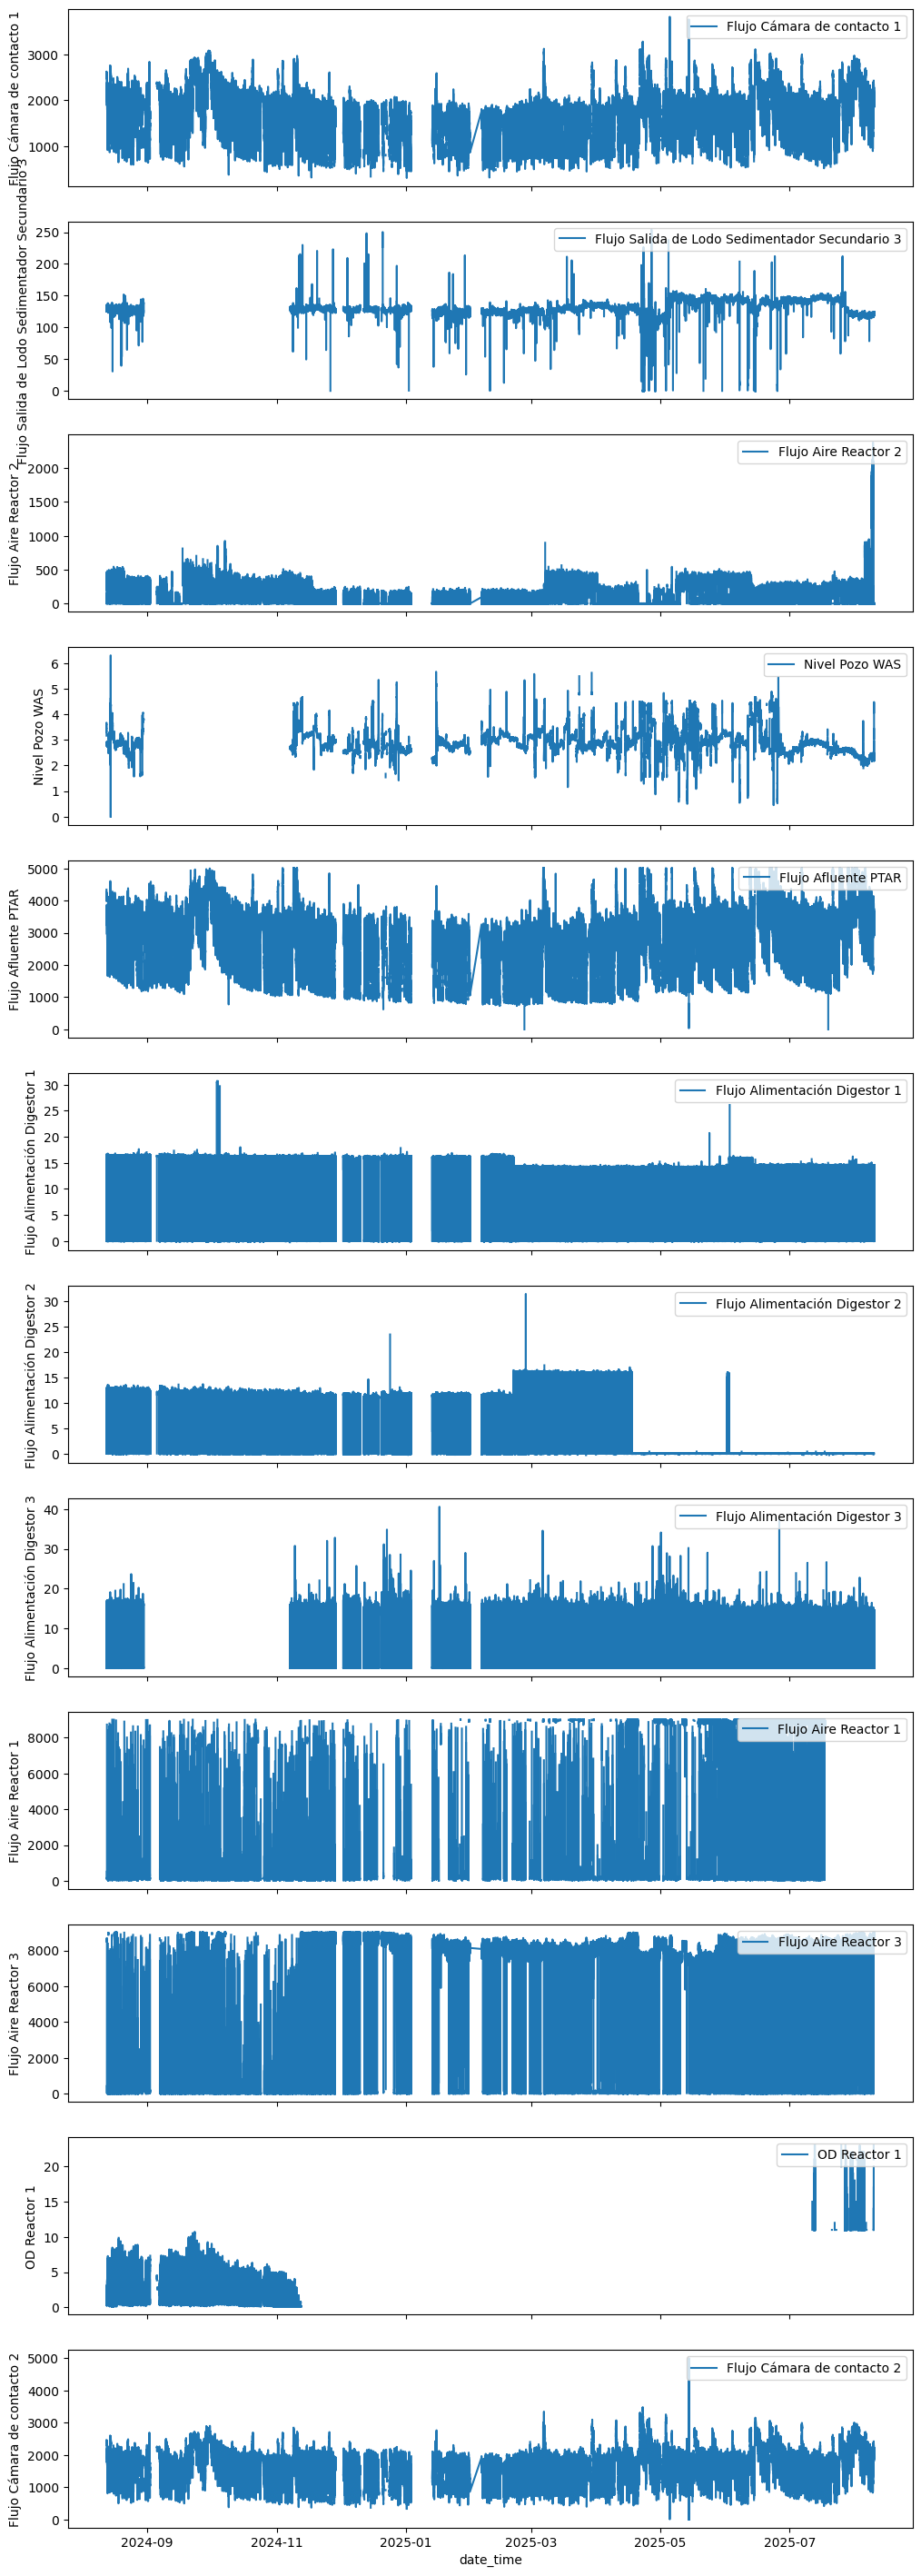

In [10]:
funciones.plot_all_timeseries(df_planta_2)

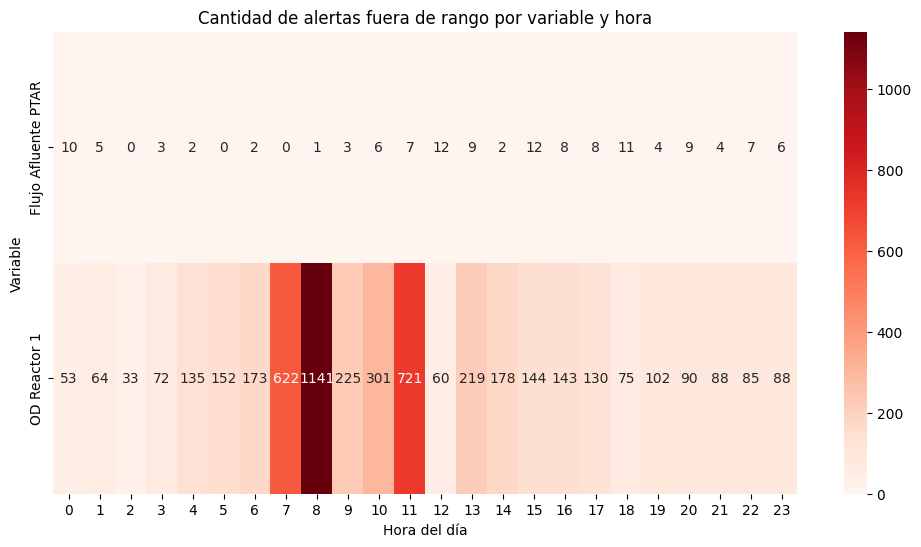

In [11]:
# Crear columna de hora
fuera_de_rango['hora'] = fuera_de_rango['date_time'].dt.hour

# Contar alertas por variable y hora
alertas_por_hora = fuera_de_rango.groupby(['name', 'hora']).size().unstack(fill_value=0)

# Graficar heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(alertas_por_hora, cmap="Reds", annot=True, fmt="d")
plt.title('Cantidad de alertas fuera de rango por variable y hora')
plt.ylabel('Variable')
plt.xlabel('Hora del día')
plt.show()

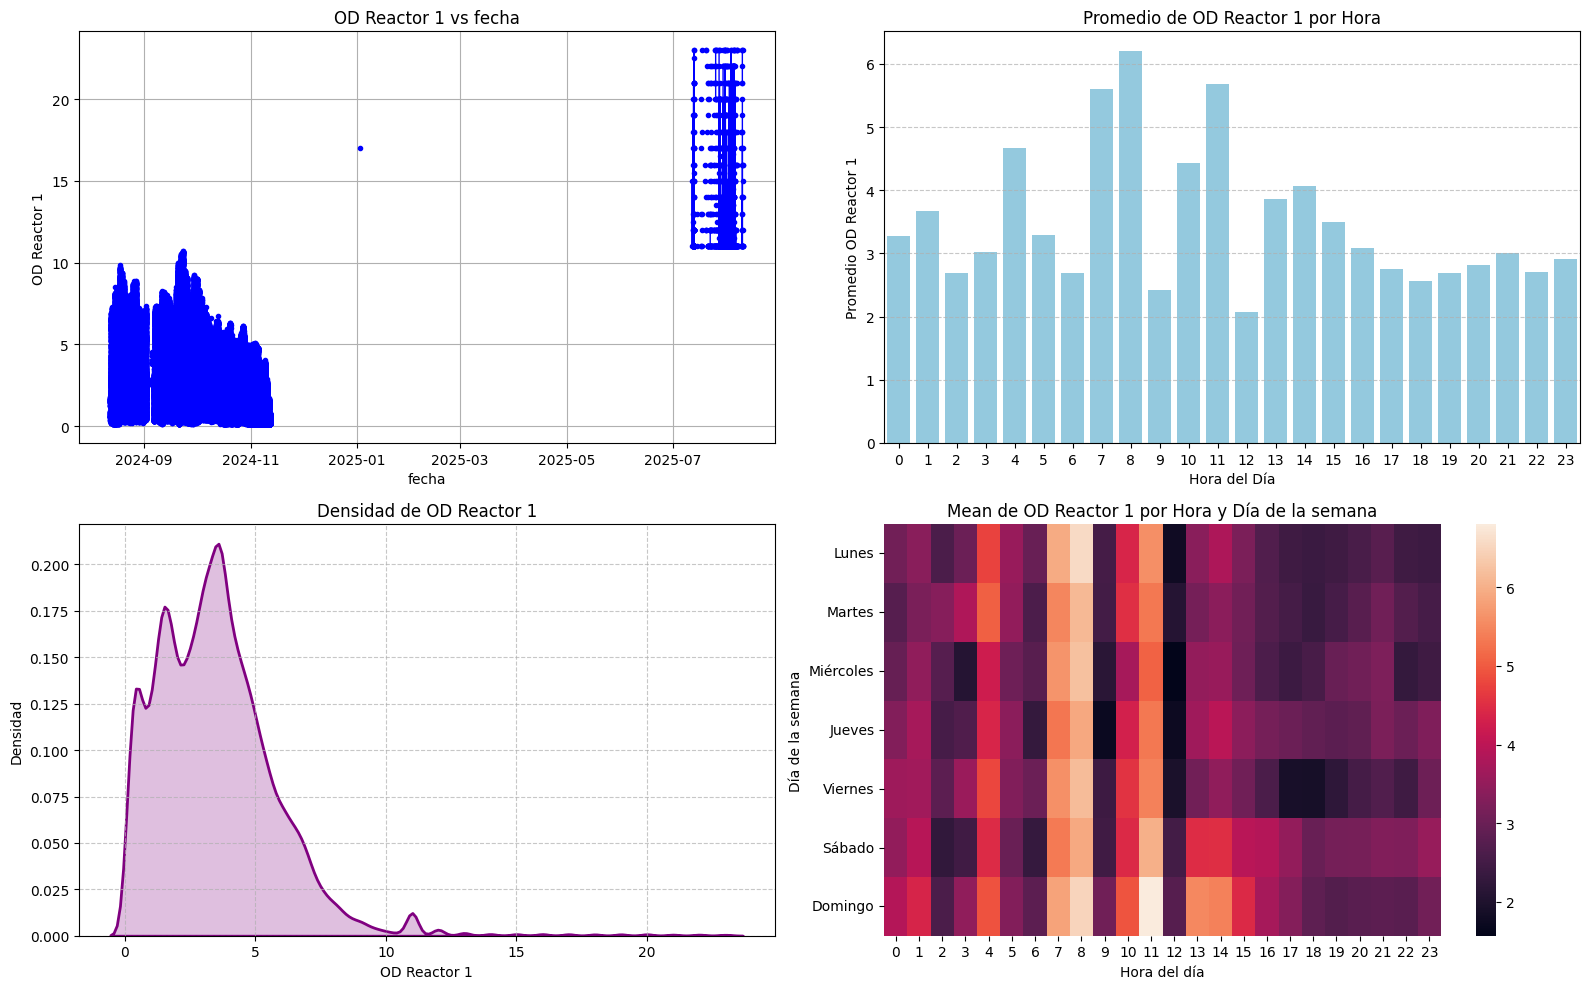

In [13]:
funciones.plot_all(df_planta_2, 'OD Reactor 1')